# اضافه کردن کتابخانه های مورد نیاز

In [1]:
from pandas_datareader import data as web
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from finta import TA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# گرفتن اطلاعات قیمتی ارز دیجیتال اتریوم 

In [2]:
data= pd.DataFrame(web.get_data_yahoo('BTC-USD',start="20210520",end=datetime.datetime.now() ))
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-19,42462.984375,35050.617188,36753.667969,40782.738281,88281943359,40782.738281
2021-05-20,42172.171875,33616.453125,40596.949219,37304.691406,82051616861,37304.691406
2021-05-21,38831.054688,35383.683594,37371.031250,37536.632812,57377273240,37536.632812
2021-05-22,38289.218750,31227.339844,37531.449219,34770.582031,78469274361,34770.582031
2021-05-23,39835.140625,34551.082031,34700.363281,38705.980469,67359584098,38705.980469
2021-05-24,39776.351562,36581.429688,38795.781250,38402.222656,56211915803,38402.222656
2021-05-25,40782.078125,37905.835938,38392.625000,39294.199219,51346735160,39294.199219
2021-05-26,40379.617188,37247.902344,39316.890625,38436.968750,43210968721,38436.968750
2021-05-27,38856.968750,34779.039062,38507.082031,35697.605469,55200191952,35697.605469


In [17]:
data= pd.DataFrame(web.get_data_yahoo('ETH-USD',start="2018-05-01",end="2021-5-12"))
crypto_data=pd.DataFrame()
crypto_data["Open"]=data.Open[:]
crypto_data["High"]=data.High[:]
crypto_data["Low"]=data.Low[:]
crypto_data["Close"]=data.Close[:]

# پیاده سازی اندیکاتور sma و ema در بازه زمانی 9 روزه

In [18]:
sma9=TA.SMA(crypto_data, 9) # period : 9
sma9=sma9.reset_index(drop=True)
ind=pd.DataFrame(sma9)
ind.columns=['sma9']

In [19]:
ema9=TA.EMA(crypto_data,9) #period = 9
ema9=ema9.reset_index(drop=True)
ind['ema9']=ema9

# ترسیم نمودار قیمتی ارز

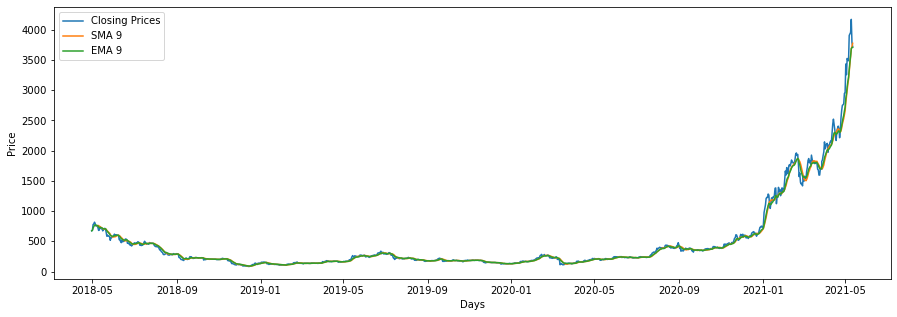

In [20]:
plt.figure(figsize=(15,5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(data.index, crypto_data['Close'], label='Closing Prices')
plt.plot(data.index, ind['sma9'], label='SMA 9')
plt.plot(data.index, ind['ema9'], label='EMA 9')
plt.legend()
plt.show()

# تقسیم داده ها به تست و آموزش 20 درصدی

In [21]:
y=crypto_data["Close"][8:]
y=y.reset_index(drop=True)
y=np.array(y)
x=ind.dropna()
x=np.array(x)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# استفاده از روش درخت تصمیم

In [22]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

# ارزیابی درصد درستی اطلاعات با استفاده از معیار score

In [23]:
clf.score(X_test,y_test)

0.9972535487550968

# مقایسه نمودار پیشبینی شده با نمودار واقعی ارز

In [24]:
p=clf.predict(X_test)

p.shape

(220,)

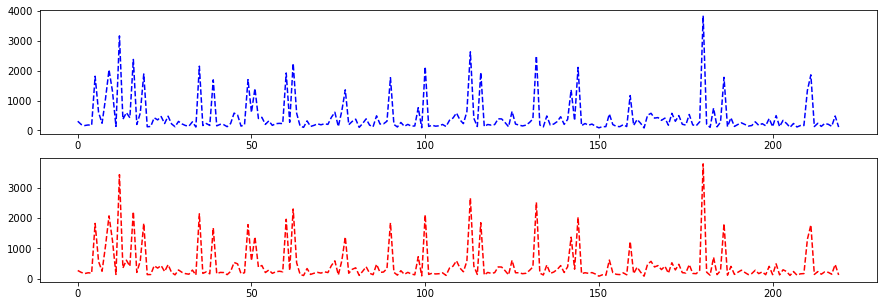

In [25]:
plt.figure(1,figsize=(15,5))
plt.subplot(211)
plt.plot(p,color='blue',linestyle='--')
plt.subplot(212)
plt.plot(y_test,color='red',linestyle='--')
plt.show()

# قسمت اول تمرین

با استفاده از استراتژی کراس مویینگ اورج ها به این صورت که وقتی ema9 به بالای sma9 کراس میکند وارد پوزیشن خرید میشویم و پوزیشن فروش را میبندیم و بالعکس 

In [26]:
vol=100
w=p
z=ind.dropna().reset_index(drop=True)
z=z[-220:].reset_index(drop=True)
r,c=z.shape
f=0
sl=0
for i in range(1,r):
    if (f==-1):
        if(w[i]>sl):
            q=s/w[i]
            vol=vol*q
            f=0
    elif(f==1):
        if(w[i]<sl):
            q=w[i]/s
            vol=vol*q
            f=0
    if float(z['sma9'][i-1])<float(z['ema9'][i-1]):
        if float(z['sma9'][i])>float(z['ema9'][i]):
            if f==0:
                s=w[i]
                sl=w[i]*1.005
                f=-1
            elif f==1:
                q=w[i]/s
                vol=vol*q
                s=w[i]
                sl=w[i]*1.005
                f=-1
            else:
                continue
    if float(z['sma9'][i-1])>float(z['ema9'][i-1]):
        if float(z['sma9'][i])<float(z['ema9'][i]):
            if f==0:
                s=w[i]
                sl=w[i]*0.995
                f=1
            elif f==-1:
                q=s/w[i]
                vol=vol*q
                s=w[i]
                sl=w[i]*0.995
                f=1
            else:
                continue
print(vol)


6271.366384391382


# قسمت دوم تمرین

In [31]:
vol=100
w=crypto_data["Close"][8:]
w=w.reset_index(drop=True)
z=ind.dropna().reset_index(drop=True)
z=z.reset_index(drop=True)
for j in range(0,4):
    k=w[0+274*j:274+274*j]
    l=z[0+274*j:274+274*j]
    f=0
    X_train,X_test,y_train,y_test=train_test_split(l,k,test_size=0.2)
    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    u=clf.predict(X_test)
    r=u.shape[0]
    a=ind.dropna().reset_index(drop=True)
    a=a[-r:].reset_index(drop=True)
    r,c=a.shape
    for i in range(1,r):
        if float(a['sma9'][i-1])<float(a['ema9'][i-1]):
            if float(a['sma9'][i])>float(a['ema9'][i]):
                if f==0:
                    g=u[i]
                    f=-1
                elif f==1:
                    q=u[i]/g
                    vol=vol*q
                    g=u[i]
                    f=-1
                else:
                    continue
        if float(a['sma9'][i-1])>float(a['ema9'][i-1]):
            if float(a['sma9'][i])<float(a['ema9'][i]):
                if f==0:
                    g=u[i]
                    f=1
                elif f==-1:
                    q=g/u[i]
                    vol=vol*q
                    g=u[i]
                    f=1
                else:
                    continue
print(vol)

397.4865097523764


# قسمت سوم تمرین

In [32]:
vol=100
w=crypto_data["Close"][8:]
w=w.reset_index(drop=True)
z=ind.dropna().reset_index(drop=True)
z=z.reset_index(drop=True)
for j in range(0,20):
    k=w[0+54*j:54+54*j]
    l=z[0+54*j:54+54*j]
    X_train,X_test,y_train,y_test=train_test_split(l,k,test_size=0.2)
    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    b=clf.predict(X_test)
    r=b.shape[0]
    e=ind.dropna().reset_index(drop=True)
    e=e[-r:].reset_index(drop=True)
    r,c=e.shape
    f=0
    for i in range(1,r):
        if float(e['sma9'].iloc[i-1])>float(e['ema9'].iloc[i-1]):
            if float(e['sma9'].iloc[i])<float(e['ema9'].iloc[i]):
                if f==0:
                    h=b[i]
                    f=1
                elif f==-1:
                    q=h/b[i]
                    vol=vol*q
                    h=b[i]
                    f=1
                else:
                    continue
        if float(e['sma9'].iloc[i-1])<float(e['ema9'].iloc[i-1]):
            if float(e['sma9'].iloc[i])>float(e['ema9'].iloc[i]):
                if f==0:
                    h=b[i]
                    f=-1
                elif f==1:
                    q=b[i]/h
                    vol=vol*q
                    h=b[i]
                    f=-1
                else:
                    continue
    if f==-1:
        q=h/b[r-1]
        vol=vol*q
    elif f==1:
        q=b[r-1]/h
        vol=vol*q
print(vol)

66.1148545802472
